In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
'''
train_data = pd.read_csv('train.tsv', sep='\t')

train_phrases = train_data['Phrase']
train_sentiments = train_data['Sentiment']

dev_data = pd.read_csv('test.tsv', sep='\t')

dev_phrases = train_data['Phrase']
dev_sentiments = train_data['Sentiment']

'''


train_data = pd.read_csv('new_train.tsv', sep='\t', header=None, names=['Phrase','Sentiment'])
train_data, val_data = train_test_split(
    train_data, 
    test_size=0.2, 
    random_state=42,
    stratify=train_data['Sentiment']
)

train_phrases = train_data['Phrase']
train_sentiments = train_data['Sentiment']
val_phrases = val_data['Phrase']
val_sentiments = val_data['Sentiment']

dev_data = pd.read_csv('new_test.tsv', sep='\t', header=None, names=['Phrase','Sentiment'])

dev_phrases = dev_data['Phrase']
dev_sentiments = dev_data['Sentiment']

In [2]:
def tokenize(phrase):
    phrase = re.sub(r'[^\w\s]', '', phrase).lower()
    return phrase.split()

In [3]:
'''
def build_bow_vectors(phrases, vocab=None):
    # 构建词汇表
    if vocab is None:
        all_words = set()
        for phrase in phrases:
            words = tokenize(phrase)
            all_words.update(words)
        vocab = list(all_words)
    
    vocab_size = len(vocab)
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}
    
    # 创建向量
    vectors = []
    for phrase in phrases:
        words = tokenize(phrase)
        vector = np.zeros(vocab_size)
        for word in words:
            if word in word_to_idx:
                vector[word_to_idx[word]] += 1
        vectors.append(vector)
    return np.array(vectors), vocab
    '''

'\ndef build_bow_vectors(phrases, vocab=None):\n    # 构建词汇表\n    if vocab is None:\n        all_words = set()\n        for phrase in phrases:\n            words = tokenize(phrase)\n            all_words.update(words)\n        vocab = list(all_words)\n\n    vocab_size = len(vocab)\n    word_to_idx = {word: idx for idx, word in enumerate(vocab)}\n\n    # 创建向量\n    vectors = []\n    for phrase in phrases:\n        words = tokenize(phrase)\n        vector = np.zeros(vocab_size)\n        for word in words:\n            if word in word_to_idx:\n                vector[word_to_idx[word]] += 1\n        vectors.append(vector)\n    return np.array(vectors), vocab\n    '

In [4]:
# Bag-of-Words向量化
from scipy import sparse

# Bag-of-Words向量化（稀疏矩阵）
def build_bow_vectors(phrases, vocab=None):
    if vocab is None:
        all_words = set()
        for phrase in phrases:
            words = tokenize(phrase)
            all_words.update(words)
        vocab = list(all_words)
    
    vocab_size = len(vocab)
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}
    
    row = []
    col = []
    data = []
    
    for i, phrase in enumerate(phrases):
        words = tokenize(phrase)
        for word in words:
            if word in word_to_idx:
                row.append(i)
                col.append(word_to_idx[word])
                data.append(1)
    
    vectors = sparse.csr_matrix((data, (row, col)), shape=(len(phrases), vocab_size), dtype=np.float64)
    return vectors, vocab

In [5]:
'''
# N-gram向量化（以二元组为例）
def build_ngram_vectors(phrases, vocab=None, n=3):
    # 构建N-gram词汇表
    if vocab is None:
        all_ngrams = set()
        for phrase in phrases:
            words = tokenize(phrase)
            if(len(words)<n):
                continue
            for i in range(len(words) - n + 1):
                ngram = tuple(words[i:i+n])
                all_ngrams.add(ngram)
        vocab = list(all_ngrams)
    
    vocab_size = len(vocab)
    ngram_to_idx = {ngram: idx for idx, ngram in enumerate(vocab)}
    
    # 创建向量
    vectors = []
    for phrase in phrases:
        words = tokenize(phrase)
        vector = np.zeros(vocab_size)
        for i in range(len(words) - n + 1):
            ngram = tuple(words[i:i+n])
            if ngram in ngram_to_idx:
                vector[ngram_to_idx[ngram]] += 1
        vectors.append(vector)
    return np.array(vectors), vocab
    '''

'\n# N-gram向量化（以二元组为例）\ndef build_ngram_vectors(phrases, vocab=None, n=3):\n    # 构建N-gram词汇表\n    if vocab is None:\n        all_ngrams = set()\n        for phrase in phrases:\n            words = tokenize(phrase)\n            if(len(words)<n):\n                continue\n            for i in range(len(words) - n + 1):\n                ngram = tuple(words[i:i+n])\n                all_ngrams.add(ngram)\n        vocab = list(all_ngrams)\n\n    vocab_size = len(vocab)\n    ngram_to_idx = {ngram: idx for idx, ngram in enumerate(vocab)}\n\n    # 创建向量\n    vectors = []\n    for phrase in phrases:\n        words = tokenize(phrase)\n        vector = np.zeros(vocab_size)\n        for i in range(len(words) - n + 1):\n            ngram = tuple(words[i:i+n])\n            if ngram in ngram_to_idx:\n                vector[ngram_to_idx[ngram]] += 1\n        vectors.append(vector)\n    return np.array(vectors), vocab\n    '

In [6]:
# N-gram向量化（稀疏矩阵）
def build_ngram_vectors(phrases, vocab=None, max_n=2):
    if vocab is None:
        all_ngrams = set()
        for phrase in phrases:
            words = tokenize(phrase)
            for n in range(1, max_n + 1):
                for i in range(len(words) - n + 1):
                    ngram = tuple(words[i:i+n])
                    all_ngrams.add(ngram)
        vocab = list(all_ngrams)
    
    vocab_size = len(vocab)
    ngram_to_idx = {ngram: idx for idx, ngram in enumerate(vocab)}
    
    row = []
    col = []
    data = []
    
    for i, phrase in enumerate(phrases):
        words = tokenize(phrase)
        for n in range(1, max_n + 1):
            for j in range(len(words) - n + 1):
                ngram = tuple(words[j:j+n])
                if ngram in ngram_to_idx:
                    row.append(i)
                    col.append(ngram_to_idx[ngram])
                    data.append(1)
    
    vectors = sparse.csr_matrix((data, (row, col)), shape=(len(phrases), vocab_size), dtype=np.float64)
    return vectors, vocab

In [7]:
# Softmax函数
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)


from tqdm import tqdm
import matplotlib.pyplot as plt

# 修改训练函数以记录损失和准确率
def train_softmax_regression(X, y, X_val, y_val, num_classes=5, learning_rate=0.01, epochs=100):
    num_samples, num_features = X.shape
    np.random.seed(42)
    W = np.random.randn(num_features, num_classes) * 0.01
    b = np.zeros(num_classes)
    
    losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in tqdm(range(epochs), desc="Training"):
        # 前向传播（训练集）
        Z = X @ W + b
        P = softmax(Z)
        
        # 计算训练损失
        y_onehot = np.zeros((num_samples, num_classes))
        y_onehot[np.arange(num_samples), y] = 1
        loss = -np.mean(np.sum(y_onehot * np.log(P + 1e-9), axis=1))
        
        # 计算训练准确率
        pred_train = np.argmax(P, axis=1)
        train_accuracy = np.mean(pred_train == y)
        
        # 计算验证准确率
        pred_val = predict(X_val, W, b)
        val_accuracy = np.mean(pred_val == y_val)
        
        # 记录损失和准确率
        losses.append(loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # 反向传播
        dZ = P - y_onehot
        dW = X.T @ dZ / num_samples
        db = np.sum(dZ, axis=0) / num_samples
        
        # 更新参数
        W -= learning_rate * dW
        b -= learning_rate * db
    
    return W, b, losses, train_accuracies, val_accuracies

# 修改绘图函数以包含验证准确率
def plot_training_metrics(losses, train_accuracies, val_accuracies, title="Training Metrics"):
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Loss', color='red')
    plt.plot(train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(val_accuracies, label='Validation Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 预测函数
def predict(X, W, b):
    Z = X @ W + b
    P = softmax(Z)
    return np.argmax(P, axis=1)

In [8]:
# # 修改Bag-of-Words训练和验证部分
# train_bow, bow_vocab = build_bow_vectors(train_phrases)
# dev_bow, _ = build_bow_vectors(dev_phrases, bow_vocab)

# # 训练和验证BoW模型
# W_bow, b_bow, bow_losses, bow_accuracies,bow_val_accuracies = train_softmax_regression(train_bow, train_sentiments, dev_bow, dev_sentiments, learning_rate=0.1 , epochs=10000)
# pred_bow = predict(dev_bow, W_bow, b_bow)
# accuracy_bow = np.mean(pred_bow == dev_sentiments)
# print(f"Bag-of-Words Accuracy: {accuracy_bow:.4f}")

# # 绘制BoW训练曲线
# plot_training_metrics(bow_losses, bow_accuracies,bow_val_accuracies, title="Bag-of-Words Training Metrics")


Training: 100%|██████████| 10000/10000 [03:08<00:00, 52.97it/s]


N-gram Validation Accuracy: 0.4971


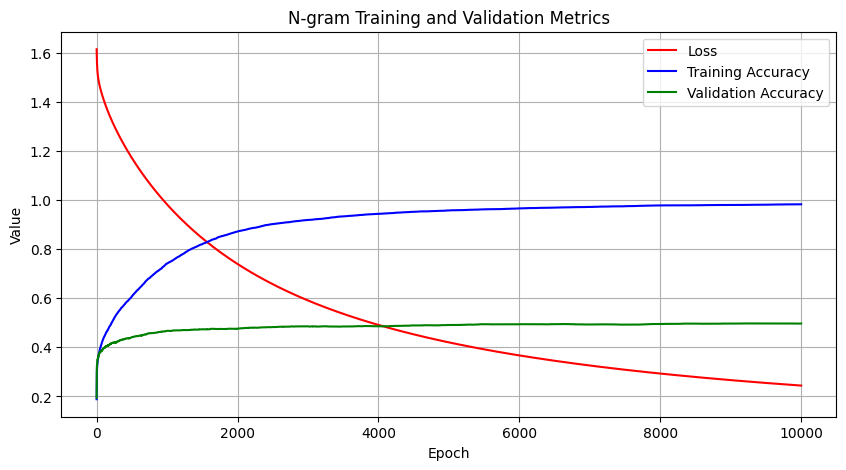

In [11]:
# 修改N-gram训练和验证部分
train_ngram, ngram_vocab = build_ngram_vectors(train_phrases, max_n=4)
dev_ngram, _ = build_ngram_vectors(dev_phrases, vocab=ngram_vocab, max_n=4)

# 训练和验证N-gram模型（使用dev集作为验证集）
W_ngram, b_ngram, ngram_losses, ngram_train_accuracies, ngram_val_accuracies = train_softmax_regression(
    train_ngram, train_sentiments, dev_ngram, dev_sentiments, learning_rate=0.1, epochs=10000)
pred_ngram = predict(dev_ngram, W_ngram, b_ngram)
accuracy_ngram = np.mean(pred_ngram == dev_sentiments)
print(f"N-gram Validation Accuracy: {accuracy_ngram:.4f}")

# 绘制N-gram训练曲线
plot_training_metrics(ngram_losses, ngram_train_accuracies, ngram_val_accuracies, title="N-gram Training and Validation Metrics")